In [34]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure', figsize = (15,10))

In [3]:
dff_1415 = pd.read_pickle('./dataset/fall1415.pkl')
dff_1415

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS
0,08068631,07122,2014-09-06,17,B,8,0802,B080203,028,M,40세~44세,100,14000,2014,B8
1,08942410,17967,2014-11-30,15,B,15,1502,B150203,050,M,20세~24세,100,1750,2014,B15
2,08942410,17967,2014-11-30,15,B,47,4703,B470302,050,M,20세~24세,100,7900,2014,B47
3,08942410,17967,2014-11-30,15,B,77,7707,B770702,050,M,20세~24세,100,16898,2014,B77
4,08942410,17967,2014-11-30,15,B,82,8202,B820201,050,M,20세~24세,100,7731,2014,B82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449415,07143341,08054,2015-10-20,18,B,45,4506,B450601,013,F,35세~39세,055,15800,2015,B45
3449416,07143342,05446,2015-10-20,19,B,18,1807,B180707,013,F,45세~49세,055,2000,2015,B18
3449417,07598192,01584,2015-09-16,10,B,90,9001,B900103,018,F,55세~59세,100,11850,2015,B90
3449418,07598193,00033,2015-09-16,15,B,5,0510,B051005,018,M,60세이상,100,3160,2015,B5


In [24]:
# 가을시즌 제휴사별 매출총액

df = dff_1415.copy()


AFFIL
A    143519702520
B     27310194457
C     13084071419
D       251521929
Name: PURCHAMOUNT, dtype: int64

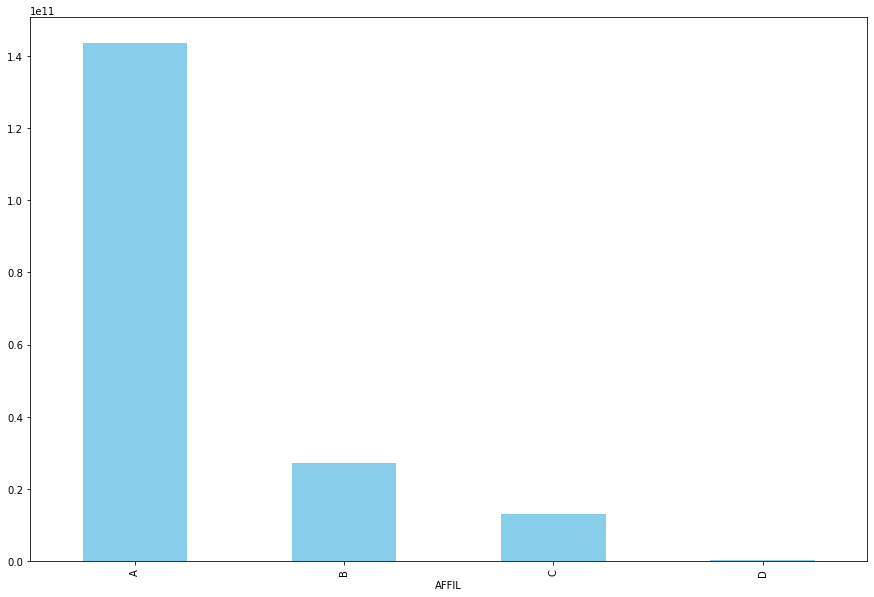

In [49]:
# 가을시즌 제휴사별 매출 총액
a = df.groupby('AFFIL').sum()['PURCHAMOUNT']
a.plot(kind='bar',color = 'skyblue')
a

AFFIL
A    101880.883537
B      8554.544293
C      5716.856122
D      8363.712599
Name: PURCHAMOUNT, dtype: float64

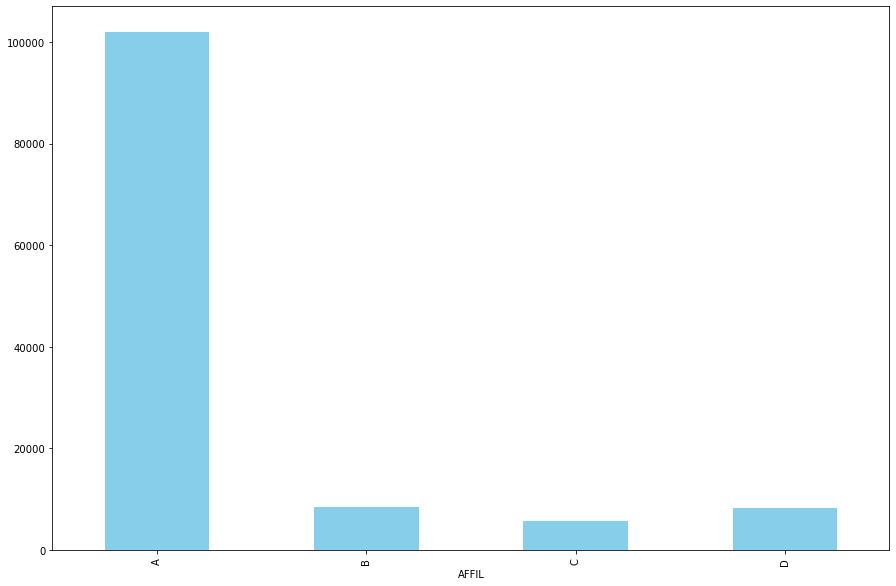

In [48]:
# 가을시즌 제휴사별 매출 평균
a = df.groupby('AFFIL').mean()['PURCHAMOUNT']
a.plot(kind='bar', color = 'skyblue' )
a

C:\Users\admin\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


B    3192478
C    2288683
A    1408701
D      30073
Name: AFFIL, dtype: int64

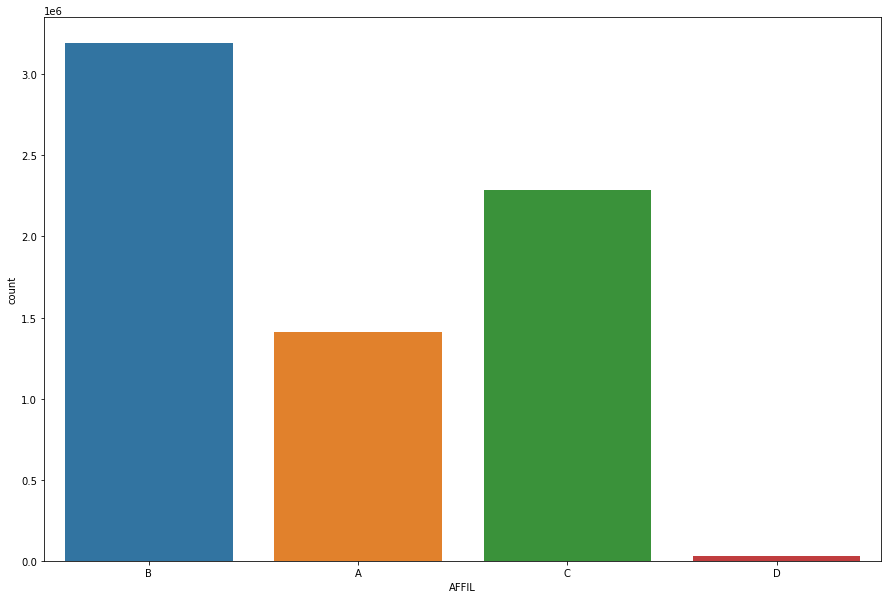

In [41]:
# 제휴사별 구매빈도?
sns.countplot('AFFIL', data = df)
df.AFFIL.value_counts()

In [ ]:
a = df.AFFIL_CLASS.sum()['PURCHAMOUNT']
a.plot(kind='bar',color = 'black')
a


In [4]:
ndf_temp = dff_1415.copy()
ndf_temp.CLASSCODEL = ndf_temp.CLASSCODEL.astype('int')
ndf_temp['AFFIL_CLASS'] = ndf_temp['AFFIL'] + ndf_temp['CLASSCODEL'].astype('str')

In [5]:
total_food = ['A1','B1', 'B2', 'B3', 'B4', 'B5', 'B6',
          'B7', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16','B37', 'B38',
          'B43', 'B46', 'B47', 'B48','B52', 'B53', 'B54', 'B55',
          'B56', 'B57', 'B58', 'B59', 'B60', 'B61', 'B62', 'B63',
          'B64', 'B65', 'B67', 'B72','B81', 'B82', 'B83', 'B89', 'B91', 'B92',
         'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
         'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'D4']


total_nor = ['A2', 'A3', 'A8', 'A9', 'A10', 'B17',
        'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B31', 'B32',
         'B34', 'B35', 'B66', 'B67','B77', 'B79', 'B80', 'B84', 'B86', 'B87', 'B88',
             'C16', 'C17', 'D1', 'D2', 'D3', 'D5', 'D6', 'D7']

total_cloth = ['A4', 'A5', 'B29','B30', 'B28', 'B32', 'B33', 'B44',
               'B49', 'B50', 'B51', 'B68', 'B69']

total_hobby = ['A6', 'B25', 'B26', 'B27', 'B35', 'B36', 'B71']

total_rich = ['A8', 'B28', 'B70']
total_etc = ['B8', 'B45', 'B90', 'D7', 'D8']


def prod_cat(data):
    if data in total_food:
        return '식품'
    elif data in total_nor:
        return '생활용품'
    elif data in total_cloth:
        return '의류'
    elif data in total_hobby:
        return '취미'
    elif data in total_rich:
        return '사치'
    elif data in total_etc:
        return '기타'
    
ndf = ndf_temp.copy()
ndf['prod_cat'] = ndf.AFFIL_CLASS.map(prod_cat)
ndf


,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
0,08068631,07122,2014-09-06,17,B,8,0802,B080203,028,M,40세~44세,100,14000,2014,B8,기타
1,08942410,17967,2014-11-30,15,B,15,1502,B150203,050,M,20세~24세,100,1750,2014,B15,식품
2,08942410,17967,2014-11-30,15,B,47,4703,B470302,050,M,20세~24세,100,7900,2014,B47,식품
3,08942410,17967,2014-11-30,15,B,77,7707,B770702,050,M,20세~24세,100,16898,2014,B77,생활용품
4,08942410,17967,2014-11-30,15,B,82,8202,B820201,050,M,20세~24세,100,7731,2014,B82,식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449415,07143341,08054,2015-10-20,18,B,45,4506,B450601,013,F,35세~39세,055,15800,2015,B45,기타
3449416,07143342,05446,2015-10-20,19,B,18,1807,B180707,013,F,45세~49세,055,2000,2015,B18,생활용품
3449417,07598192,01584,2015-09-16,10,B,90,9001,B900103,018,F,55세~59세,100,11850,2015,B90,기타
3449418,07598193,00033,2015-09-16,15,B,5,0510,B051005,018,M,60세이상,100,3160,2015,B5,식품


In [6]:
ndf[ndf.prod_cat.isnull()]

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
19,08710614,09826,2014-11-27,17,B,74,7401,B740101,044,F,30세~34세,100,2750,2014,B74,None
26,08710615,17694,2014-11-27,18,B,73,7304,B730402,044,F,50세~54세,100,1980,2014,B73,None
62,08710118,17747,2014-11-24,22,B,74,7401,B740101,044,F,45세~49세,100,3170,2014,B74,None
200,07070061,03849,2014-10-30,16,B,74,7404,B740401,013,F,45세~49세,055,4960,2014,B74,None
205,07070062,04275,2014-10-30,16,B,73,7304,B730402,013,F,45세~49세,055,5980,2014,B73,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449322,08832227,17341,2015-09-15,16,B,73,7304,B730402,046,F,45세~49세,100,3300,2015,B73,None
3449337,10721363,16846,2015-09-19,18,B,73,7302,B730203,125,M,30세~34세,240,5500,2015,B73,None
3449374,10721393,12529,2015-09-20,22,B,74,7401,B740101,125,F,45세~49세,240,6340,2015,B74,None
3449383,10721395,16686,2015-09-20,21,B,74,7401,B740101,125,M,40세~44세,240,3170,2015,B74,None


In [7]:
df_food = ndf.loc[ndf.prod_cat=='식품']
df_nor = ndf.loc[ndf.prod_cat=='생활용품']
df_cloth = ndf.loc[ndf.prod_cat=='의류']
df_hobby = ndf.loc[ndf.prod_cat=='취미']
df_rich = ndf.loc[ndf.prod_cat=='사치']
df_etc = ndf.loc[ndf.prod_cat=='기타']

In [6]:
ndf['prod_cat'] = ndf.AFFIL_CLASS.map(prod_cat)

In [8]:
# ndf.loc[ndf_AFFIL_CLASS=='A7'].index
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='A7'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B74'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B73'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B75'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B76'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B78'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B85'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B39'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B40'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B41'].index, axis=0)
ndf = ndf.drop(ndf.loc[ndf.AFFIL_CLASS=='B42'].index, axis=0)
ndf

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
0,08068631,07122,2014-09-06,17,B,8,0802,B080203,028,M,40세~44세,100,14000,2014,B8,기타
2,08942410,17967,2014-11-30,15,B,47,4703,B470302,050,M,20세~24세,100,7900,2014,B47,식품
3,08942410,17967,2014-11-30,15,B,77,7707,B770702,050,M,20세~24세,100,16898,2014,B77,생활용품
4,08942410,17967,2014-11-30,15,B,82,8202,B820201,050,M,20세~24세,100,7731,2014,B82,식품
5,08942410,17967,2014-11-30,15,B,89,8901,B890103,050,M,20세~24세,100,7800,2014,B89,식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449415,07143341,08054,2015-10-20,18,B,45,4506,B450601,013,F,35세~39세,055,15800,2015,B45,기타
3449416,07143342,05446,2015-10-20,19,B,18,1807,B180707,013,F,45세~49세,055,2000,2015,B18,생활용품
3449417,07598192,01584,2015-09-16,10,B,90,9001,B900103,018,F,55세~59세,100,11850,2015,B90,기타
3449418,07598193,00033,2015-09-16,15,B,5,0510,B051005,018,M,60세이상,100,3160,2015,B5,식품


In [22]:
df_food

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
2,08942410,17967,2014-11-30,15,B,47,4703,B470302,050,M,20세~24세,100,7900,2014,B47,식품
4,08942410,17967,2014-11-30,15,B,82,8202,B820201,050,M,20세~24세,100,7731,2014,B82,식품
5,08942410,17967,2014-11-30,15,B,89,8901,B890103,050,M,20세~24세,100,7800,2014,B89,식품
6,08942411,18469,2014-11-30,16,B,56,5603,B560302,050,F,25세~29세,100,3300,2014,B56,식품
7,08942412,00908,2014-11-30,20,B,9,0903,B090302,050,F,55세~59세,020,8800,2014,B9,식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449406,07143930,10897,2015-10-23,20,B,15,1502,B150204,013,M,40세~44세,055,750,2015,B15,식품
3449407,07143930,10897,2015-10-23,20,B,15,1505,B150501,013,M,40세~44세,055,1400,2015,B15,식품
3449413,07144381,12168,2015-10-26,15,B,48,4804,B480401,013,F,35세~39세,055,11880,2015,B48,식품
3449418,07598193,00033,2015-09-16,15,B,5,0510,B051005,018,M,60세이상,100,3160,2015,B5,식품


In [14]:
df_etc.구매금액.describe()

count    7.187900e+04
mean     2.893078e+04
std      9.954952e+04
min      1.000000e+01
25%      5.700000e+03
50%      1.200000e+04
75%      2.920000e+04
max      1.500000e+07
Name: 구매금액, dtype: float64

In [15]:
df_rich.구매금액.describe()

count      2590.000000
mean      15256.567568
std       17965.723340
min         300.000000
25%        7000.000000
50%       10000.000000
75%       17000.000000
max      195000.000000
Name: 구매금액, dtype: float64

<AxesSubplot:xlabel='AFFIL_CLASS'>

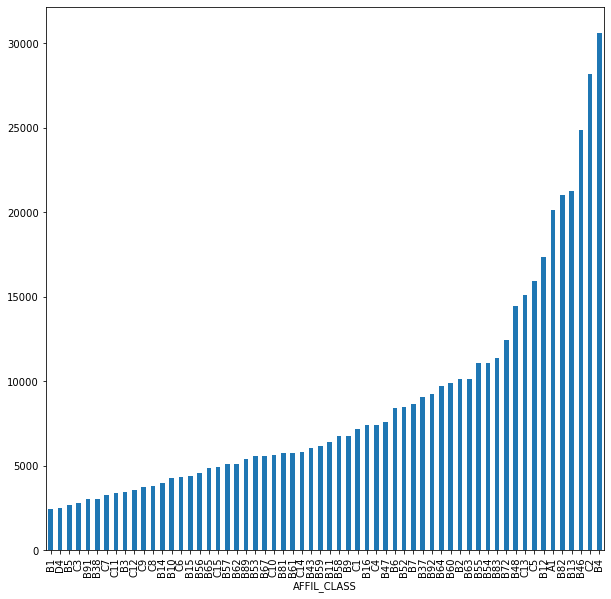

In [10]:
fig = plt.figure(figsize=(10,10))
d = df_food.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
# 식품군 대분류코드별 구매가격(평균)

<AxesSubplot:xlabel='AFFIL_CLASS'>

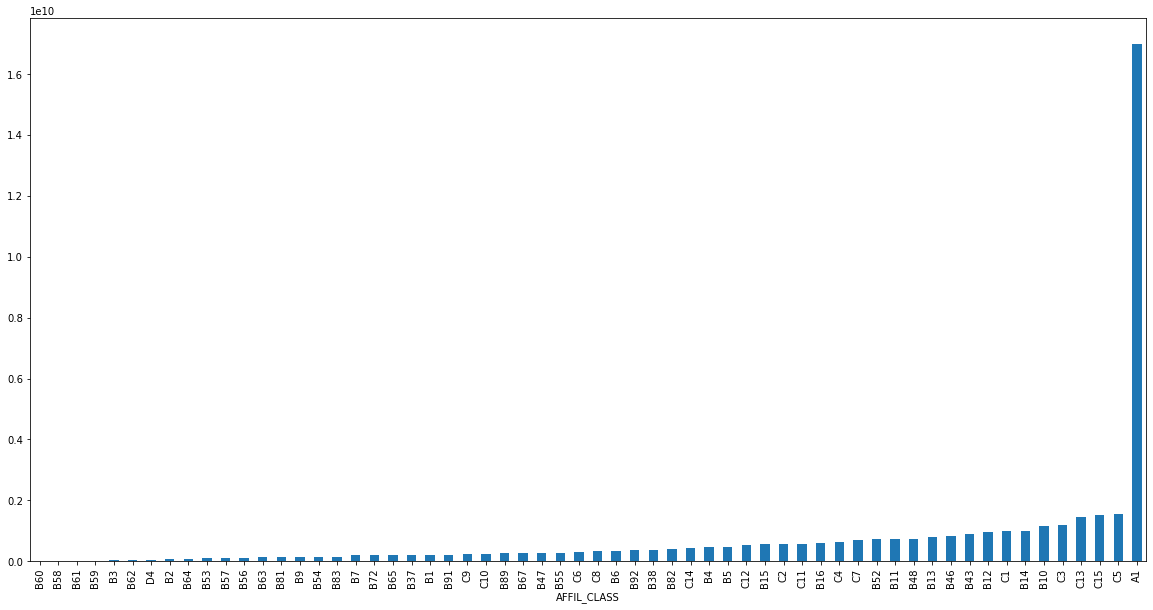

In [11]:
d = df_food.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
# 식품 대분류코드별 구매가격(총)

<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

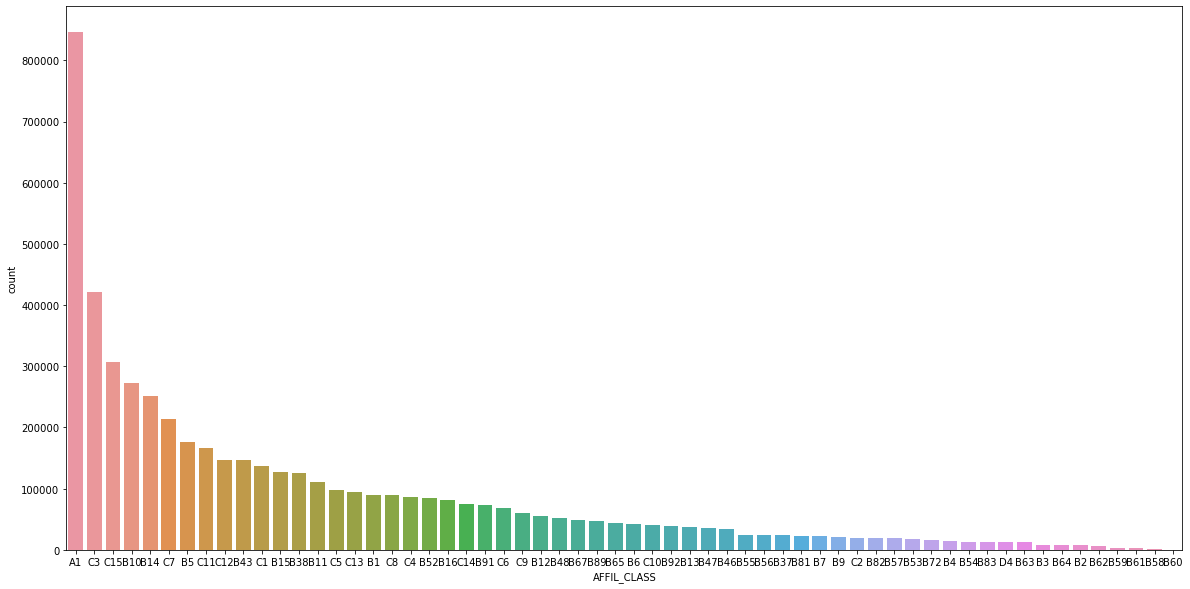

In [23]:
sns.countplot('AFFIL_CLASS', data = df_food,order = df_food['AFFIL_CLASS'].value_counts().index)
# 식품 - 분류코드별 구매빈도

<AxesSubplot:xlabel='AFFIL_CLASS'>

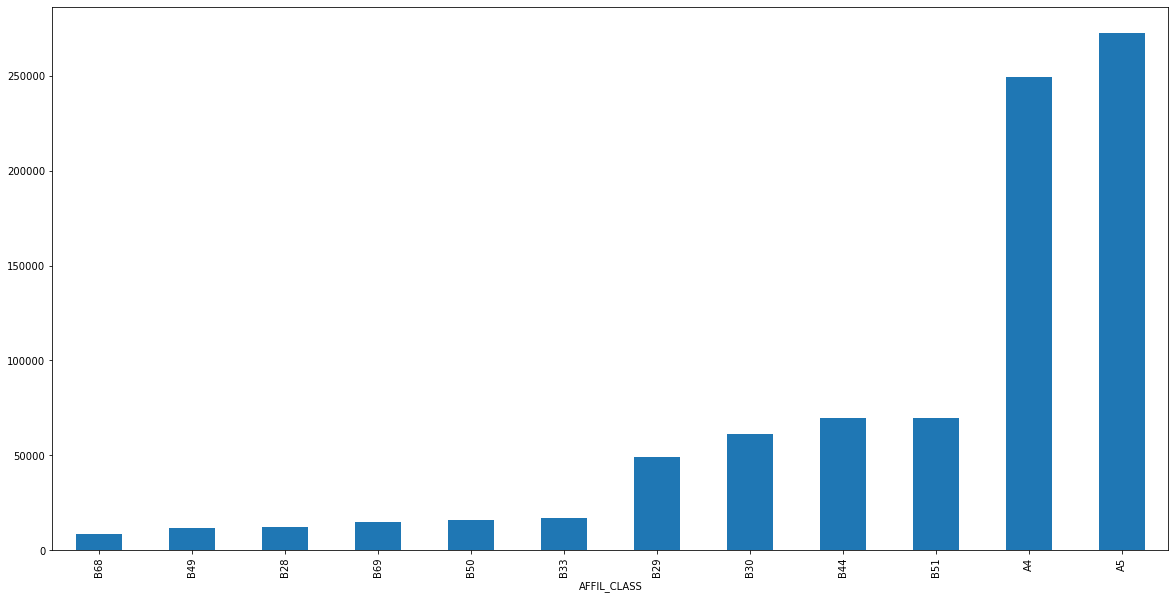

In [75]:

d = df_cloth.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
# 의류 - 상품별 구매가격(평균)

C:\Users\bs\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

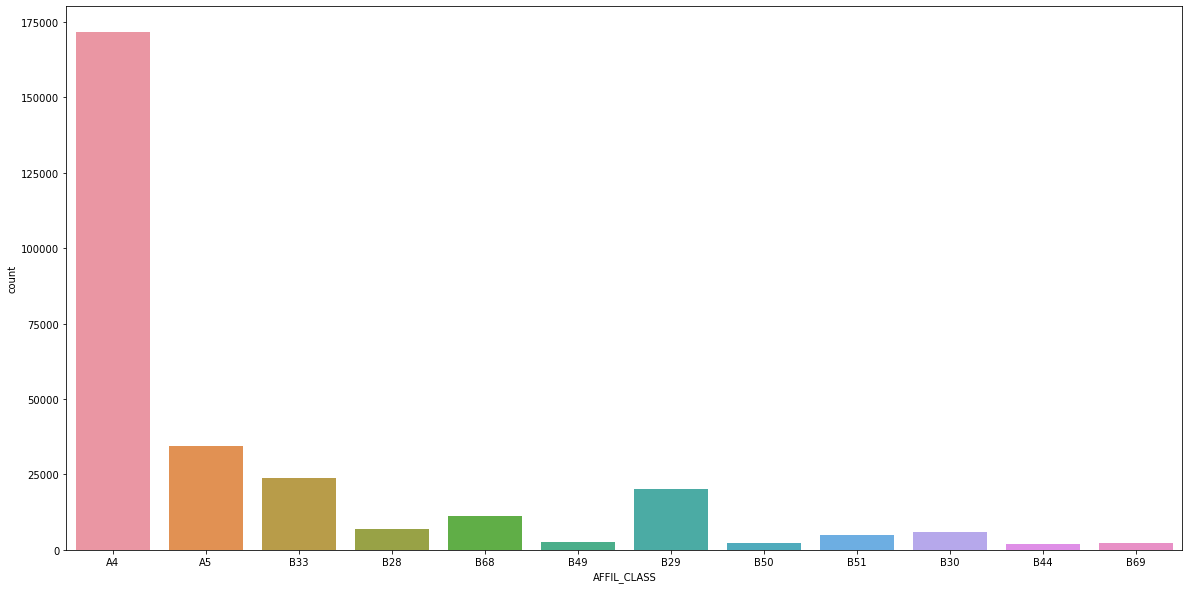

In [74]:
sns.countplot('AFFIL_CLASS', data = df_cloth , orient = 'h') 
# 의류 - 상품별 구매빈도

<AxesSubplot:xlabel='AFFIL_CLASS'>

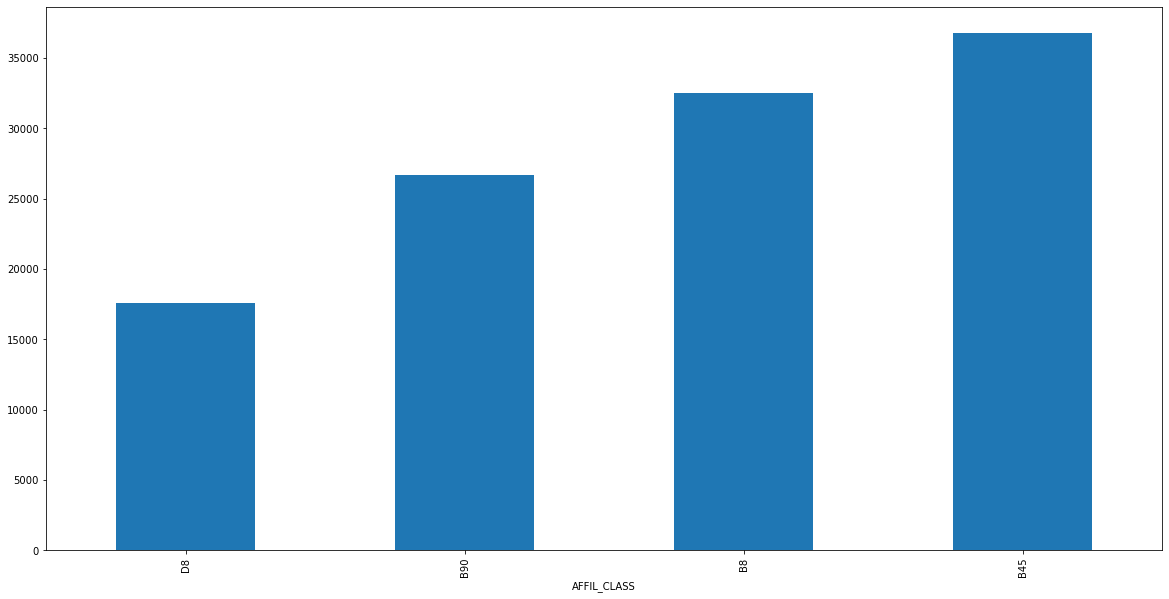

In [77]:
d = df_etc.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')

C:\Users\bs\anaconda3\envs\bs\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

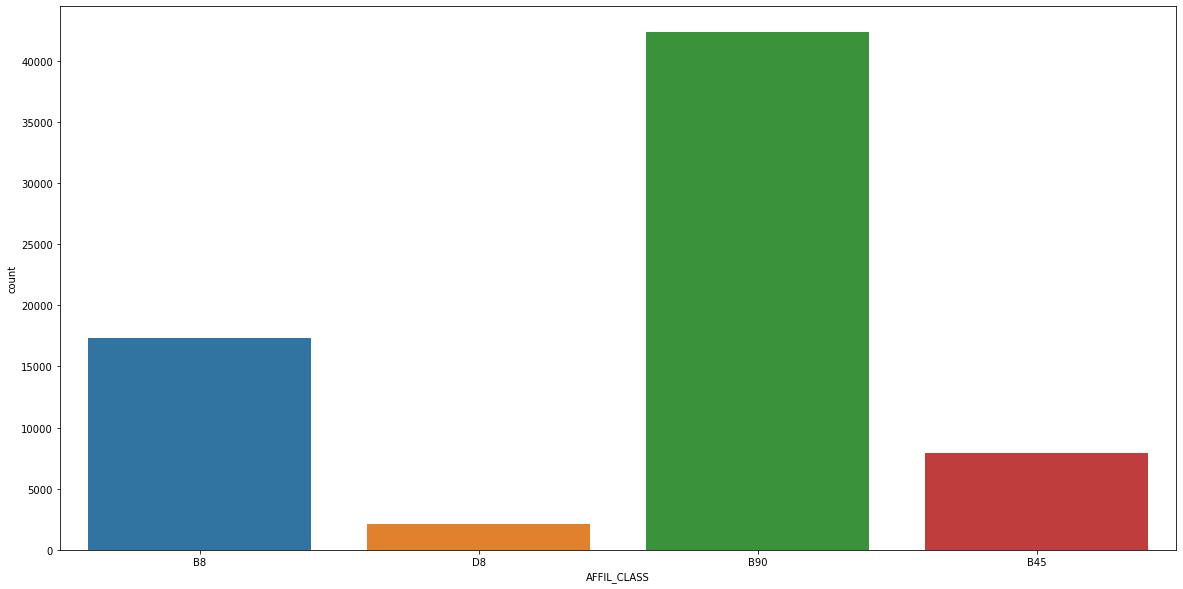

In [78]:
sns.countplot('AFFIL_CLASS', data = df_etc , orient = 'h') 

<AxesSubplot:xlabel='AFFIL_CLASS'>

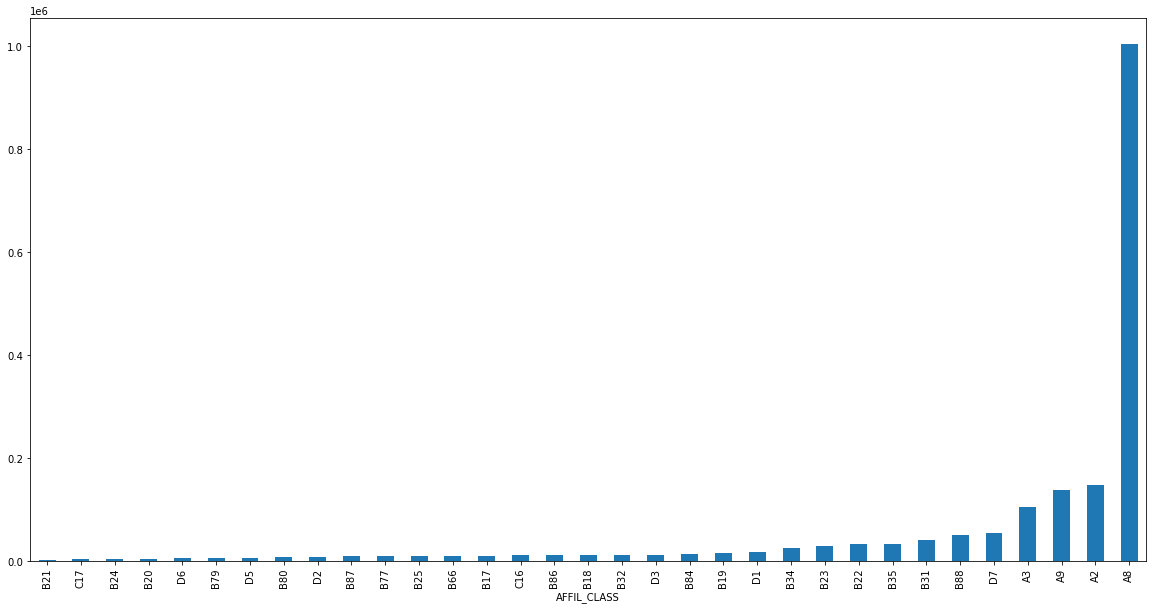

In [79]:
d = df_nor.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
# A8 = 명품